In [171]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

In [172]:
train = pd.read_csv("train.csv")

In [173]:
train.shape

(891, 12)

In [174]:

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
train['Age'].median()
train['Age'].fillna(value = 28, inplace = True);


In [177]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Let's now make some charts.
Let's visualize survival based on the gender.

In [178]:
pd.DataFrame(data= [train['Survived'],train["Sex"]])

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male


In [179]:
survived_sex = train[train['Survived'] == 1]['Sex'].value_counts()

In [180]:
dead_sex = train[train['Survived'] == 0]['Sex'].value_counts()

In [181]:
df = pd.DataFrame(data= [survived_sex,dead_sex],index = ['Survived','dead'])

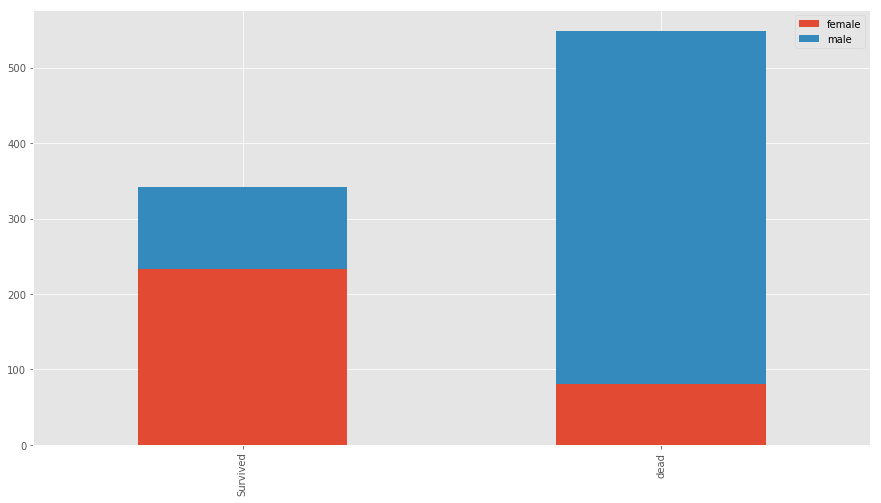

In [182]:
%matplotlib inline
df.plot(kind = 'bar',stacked = True,figsize = (15,8) )

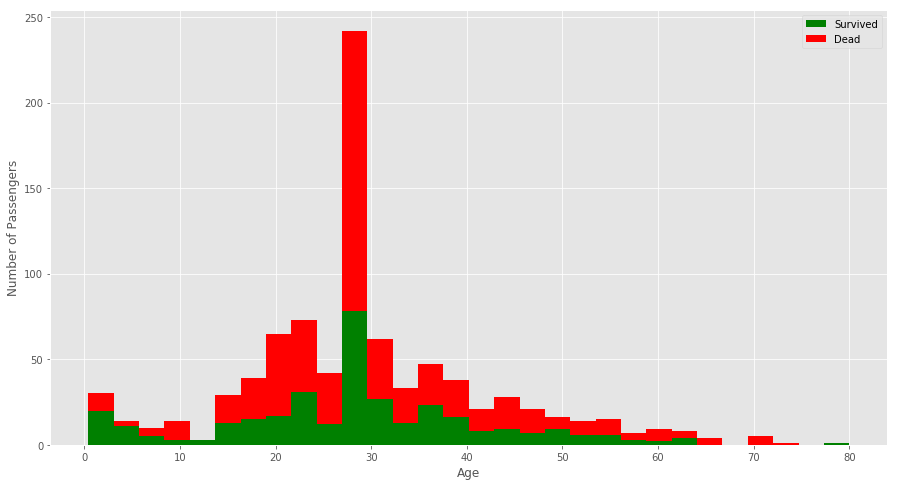

In [183]:

figure = plt.figure(figsize = (15,8))
plt.hist([train[train['Survived'] == 1]['Age'],train[train['Survived'] == 0]['Age']],label = ['Survived','Dead'],stacked = True , color =['g','r'],bins = 30)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

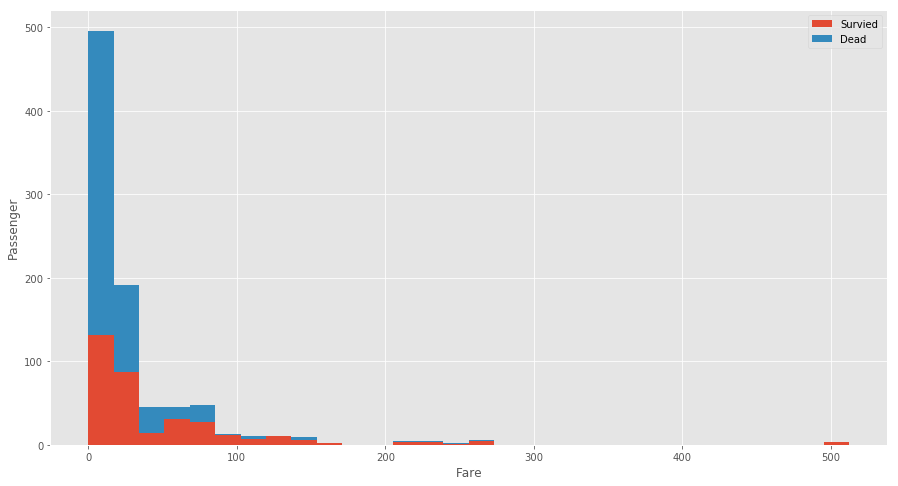

In [184]:
figure = plt.figure(figsize = (15,8))
plt.hist([train[train['Survived'] == 1]['Fare'],train[train['Survived'] == 0]['Fare']],bins = 30,stacked = True,label = ['Survied','Dead'])
plt.xlabel('Fare')
plt.ylabel('Passenger')
plt.legend()

# Let's now combine the age, the fare and the survival on a single chart.

In [185]:
y1 = train[train['Survived'] == 0]['Fare']
x1 = train[train['Survived'] == 0]['Age']
y2 = train[train['Survived'] == 1]['Fare']
x2 = train[train['Survived'] == 1]['Age']

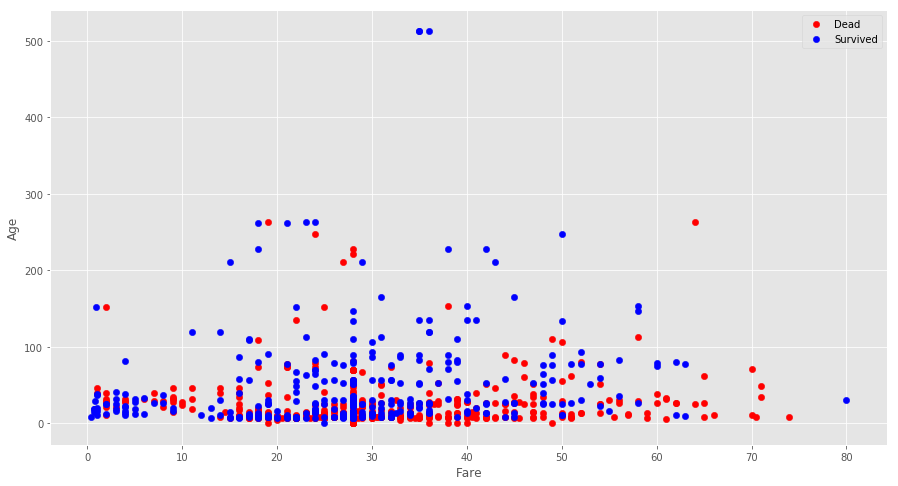

In [186]:
figure = plt.figure(figsize = (15,8))
ax = plt.subplot()
ax.scatter(x1,y1,c ='red',s = 40)
ax.scatter(x2,y2,c ='blue',s = 40)
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
plt.legend(['Dead','Survived'])

# The ticket fare correlates with the class as we see it in the chart below.

In [187]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

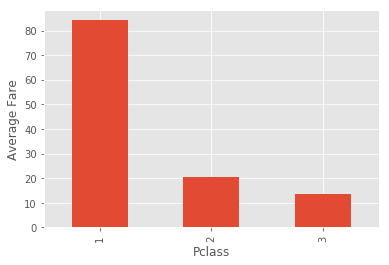

In [189]:
ax = train.groupby(['Pclass'])['Fare'].mean()
axx = ax.plot(kind = 'bar')
axx.set_ylabel('Average Fare')

Let's now see how the embarkation site affects the survival.

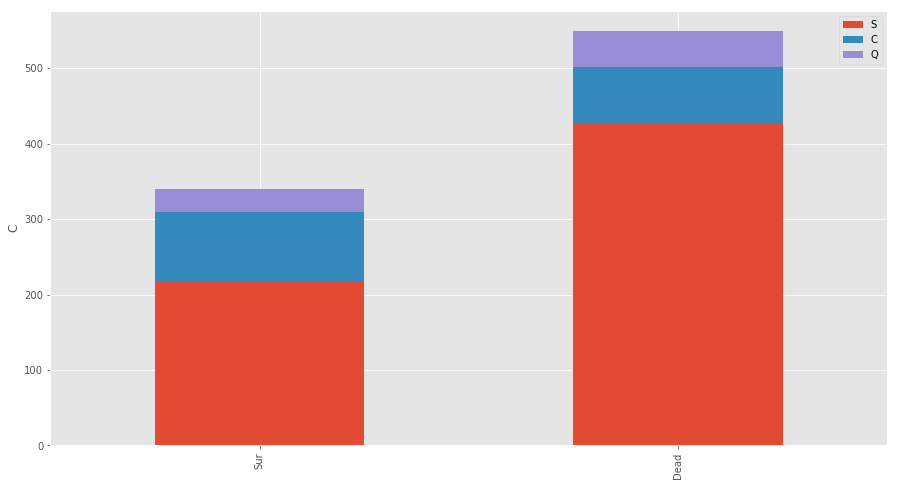

In [190]:

survived_embarked = train[train['Survived'] == 1]['Embarked'].value_counts()
dead_embarked = train[train['Survived'] == 0]['Embarked'].value_counts()
embarked = pd.DataFrame([survived_embarked,dead_embarked], index = ['Sur','Dead'])
em = embarked.plot(kind = 'bar',stacked = True, figsize = (15,8))
em.set_ylabel('C')

In [191]:
test = pd.read_csv('test.csv')

In [192]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
train.drop('Survived',axis = 1, inplace = True)

In [195]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
combined = train.append(test)

In [197]:
combined.shape



(1309, 11)

In [198]:
def get_titles():
    global combined
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [199]:
get_titles()

In [200]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


# To understand why, let's group our dataset by sex, Title and passenger class and for each subset compute the median age.

In [201]:
grouped_train = combined.head(891).groupby(['Sex','Title','Pclass'])
grouped_train_median =  grouped_train.median()
grouped_test = combined.iloc[891:].groupby(['Sex','Title','Pclass'])
grouped_test_median =  grouped_test.median()

In [202]:
grouped_train_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Title   Pclass                                            
female Miss    1             369.0  29.5    0.0    0.0   88.25000
               2             437.5  24.0    0.0    0.0   13.00000
               3             372.0  22.0    0.0    0.0    8.75625
       Mrs     1             499.0  38.0    1.0    0.0   79.20000
               2             439.5  31.5    1.0    0.0   26.00000
               3             405.5  29.0    1.0    1.0   15.97500
       Officer 1             797.0  49.0    0.0    0.0   25.92920
       Royalty 1             658.5  40.5    0.5    0.0   63.05000
male   Master  1             446.0   4.0    1.0    2.0  120.00000
               2             408.0   1.0    1.0    1.0   26.00000
               3             270.5   6.5    3.5    1.0   28.51250
       Mr      1             463.0  36.0    0.0    0.0   42.40000
               2             440.0  30.0    0.0    0.0   13.00000
               3             472.0  28.0    0.0    0.0    7.89580
       Officer 1             648.0  50.0    0.0    0.0   35.50000
               2             358.5  46.5    0.0    0.0   13.00000
       Royalty 1             600.0  40.0    0.0    0.0   27.72080

In [203]:
grouped_test_median

PassengerId   Age  SibSp  Parch       Fare
Sex    Title   Pclass                                            
female Miss    1            1074.0  32.0    0.0    0.0  158.20835
               2            1121.0  19.5    1.0    1.0   24.50000
               3            1090.5  22.0    0.0    0.0    7.87920
       Mrs     1            1076.0  48.0    1.0    0.0   63.35830
               2            1123.5  29.0    0.0    0.0   26.00000
               3            1048.0  28.0    1.0    0.5   14.28125
       Royalty 1            1306.0  39.0    0.0    0.0  108.90000
male   Master  1            1022.0   9.5    1.0    2.0  198.43750
               2            1033.5   5.0    0.5    1.5   27.75000
               3            1173.0   7.0    1.0    1.0   15.24580
       Mr      1            1102.0  42.0    0.0    0.0   50.24790
               2            1156.0  28.0    0.0    0.0   13.00000
               3            1101.0  25.0    0.0    0.0    7.85420
       Officer 1            1094.0  53.0    1.0    0.0   81.85830
               2            1048.5  35.5    0.5    0.5   19.50000

In [204]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1223 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [205]:
combined.drop('Name',axis = 1, inplace = True)

In [206]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [207]:
combined_title = pd.get_dummies(combined['Title'])
combined = pd.concat([combined,combined_title],axis = 1)

In [208]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,0,0,0


In [209]:
combined.drop('Title',inplace = True, axis = 1)

In [210]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [211]:
combined['Fare'].mean()
combined['Fare'].fillna(value = 33.29, inplace = True)

In [212]:
combined.head()
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1223 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Master         1309 non-null uint8
Miss           1309 non-null uint8
Mr             1309 non-null uint8
Mrs            1309 non-null uint8
Officer        1309 non-null uint8
Royalty        1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(6)
memory usage: 120.2+ KB


In [213]:
combined.head(891)['Embarked'].describe()
combined.iloc[891:]['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [214]:
combined['Embarked'].fillna(value = 's',inplace = True)

In [215]:
combined['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [216]:
combined['Cabin'].fillna('Unknown',inplace = True)

In [217]:
combined_cabin = pd.get_dummies(combined['Cabin'])
combined_cabin

,A10,A11,A14,A16,A18,A19,A20,A21,A23,A24,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [218]:
combined = pd.concat([combined,combined_cabin],axis = 1)

In [219]:
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,Unknown
count,1309.000000,1309.000000,1223.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.608888,0.498854,0.385027,33.295475,0.046600,0.200153,0.578304,0.152788,...,0.000764,0.001528,0.001528,0.003056,0.003056,0.000764,0.003056,0.003820,0.000764,0.774637
std,378.020061,0.837836,13.345257,1.041658,0.865560,51.738879,0.210862,0.400267,0.494019,0.359921,...,0.027639,0.039073,0.039073,0.055216,0.055216,0.027639,0.055216,0.061709,0.027639,0.417981
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,982.000000,3.000000,36.000000,1.000000,0.000000,31.275000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
combined['Age'].iloc[891:].mean()
combined['Age'].iloc[:891].mean()

29.36158249158249

In [221]:
combined['Age'].iloc[891:].fillna(value = 30.27,inplace = True)
combined['Age'].iloc[:891].fillna(value = 29.36,inplace = True)

In [222]:
combined.drop('Cabin',axis = 1, inplace = True)

In [223]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Master,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,Unknown
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,S,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,S,0,...,0,0,0,0,0,0,0,0,0,1


In [224]:
combined['Sex'][combined['Sex'] == 'male'] = 1
combined['Sex'][combined['Sex'] == 'female'] = 0

/Users/shimaimani/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/shimaimani/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [225]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Master,...,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,Unknown
0,1,3,1,22.0,1,0,A/5 21171,7.2500,S,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,PC 17599,71.2833,C,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,113803,53.1000,S,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,1,35.0,0,0,373450,8.0500,S,0,...,0,0,0,0,0,0,0,0,0,1


In [226]:
combined_embarked = pd.get_dummies(combined['Embarked'])

In [227]:
combined = pd.concat([combined,combined_embarked],axis = 1)

In [228]:
combined.drop('Embarked', inplace = True, axis = 1)

In [229]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 205 entries, PassengerId to s
dtypes: float64(2), int64(4), object(2), uint8(197)
memory usage: 343.9+ KB


In [230]:
combined.drop('Ticket',inplace = True,axis = 1)

In [231]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,...,F33,F38,F4,G6,T,Unknown,C,Q,S,s
0,1,3,1,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,3,1,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,1,0


# This function introduces 4 new features:
FamilySize : the total number of relatives including the passenger (him/her)self.
Sigleton : a boolean variable that describes families of size = 1
SmallFamily : a boolean variable that describes families of 2 <= size <= 4
LargeFamily : a boolean variable that describes families of 5 < size

In [232]:
combined.ix[:,4:6].head(n=20)

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,3,1
8,0,2
9,1,0


In [233]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,...,F33,F38,F4,G6,T,Unknown,C,Q,S,s
0,1,3,1,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,4,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,3,1,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [234]:
def family_process():
    global combined
    combined['FamilySize'] =  combined['SibSp'] + combined['Parch'] + 1
    combined['Singelton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['Small_Family'] = combined['FamilySize'].map(lambda s: 1 if 4 >= s >= 2 else 0)
    combined['Large_Family'] = combined['FamilySize'].map(lambda s: 1 if s > 4 else 0)
    
    
    

In [235]:
family_process()

In [236]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,...,T,Unknown,C,Q,S,s,FamilySize,Singelton,Small_Family,Large_Family
0,1,3,1,22.0,1,0,7.2500,0,0,1,...,0,1,0,0,1,0,2,0,1,0
1,2,1,0,38.0,1,0,71.2833,0,0,0,...,0,0,1,0,0,0,2,0,1,0
2,3,3,0,26.0,0,0,7.9250,0,1,0,...,0,1,0,0,1,0,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,1,0,2,0,1,0
4,5,3,1,35.0,0,0,8.0500,0,0,1,...,0,1,0,0,1,0,1,1,0,0


In [237]:
combined.drop('PassengerId',axis = 1, inplace = True)

In [238]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,...,T,Unknown,C,Q,S,s,FamilySize,Singelton,Small_Family,Large_Family
0,3,1,22.0,1,0,7.2500,0,0,1,0,...,0,1,0,0,1,0,2,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,1,0,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
3,1,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,1,0,2,0,1,0
4,3,1,35.0,0,0,8.0500,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0


In [239]:
from sklearn.ensemble import RandomForestClassifier
train = combined.iloc[:891]
test = combined.iloc[891:]
train0 = pd.read_csv('train.csv')
targets = train0['Survived']

# Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.


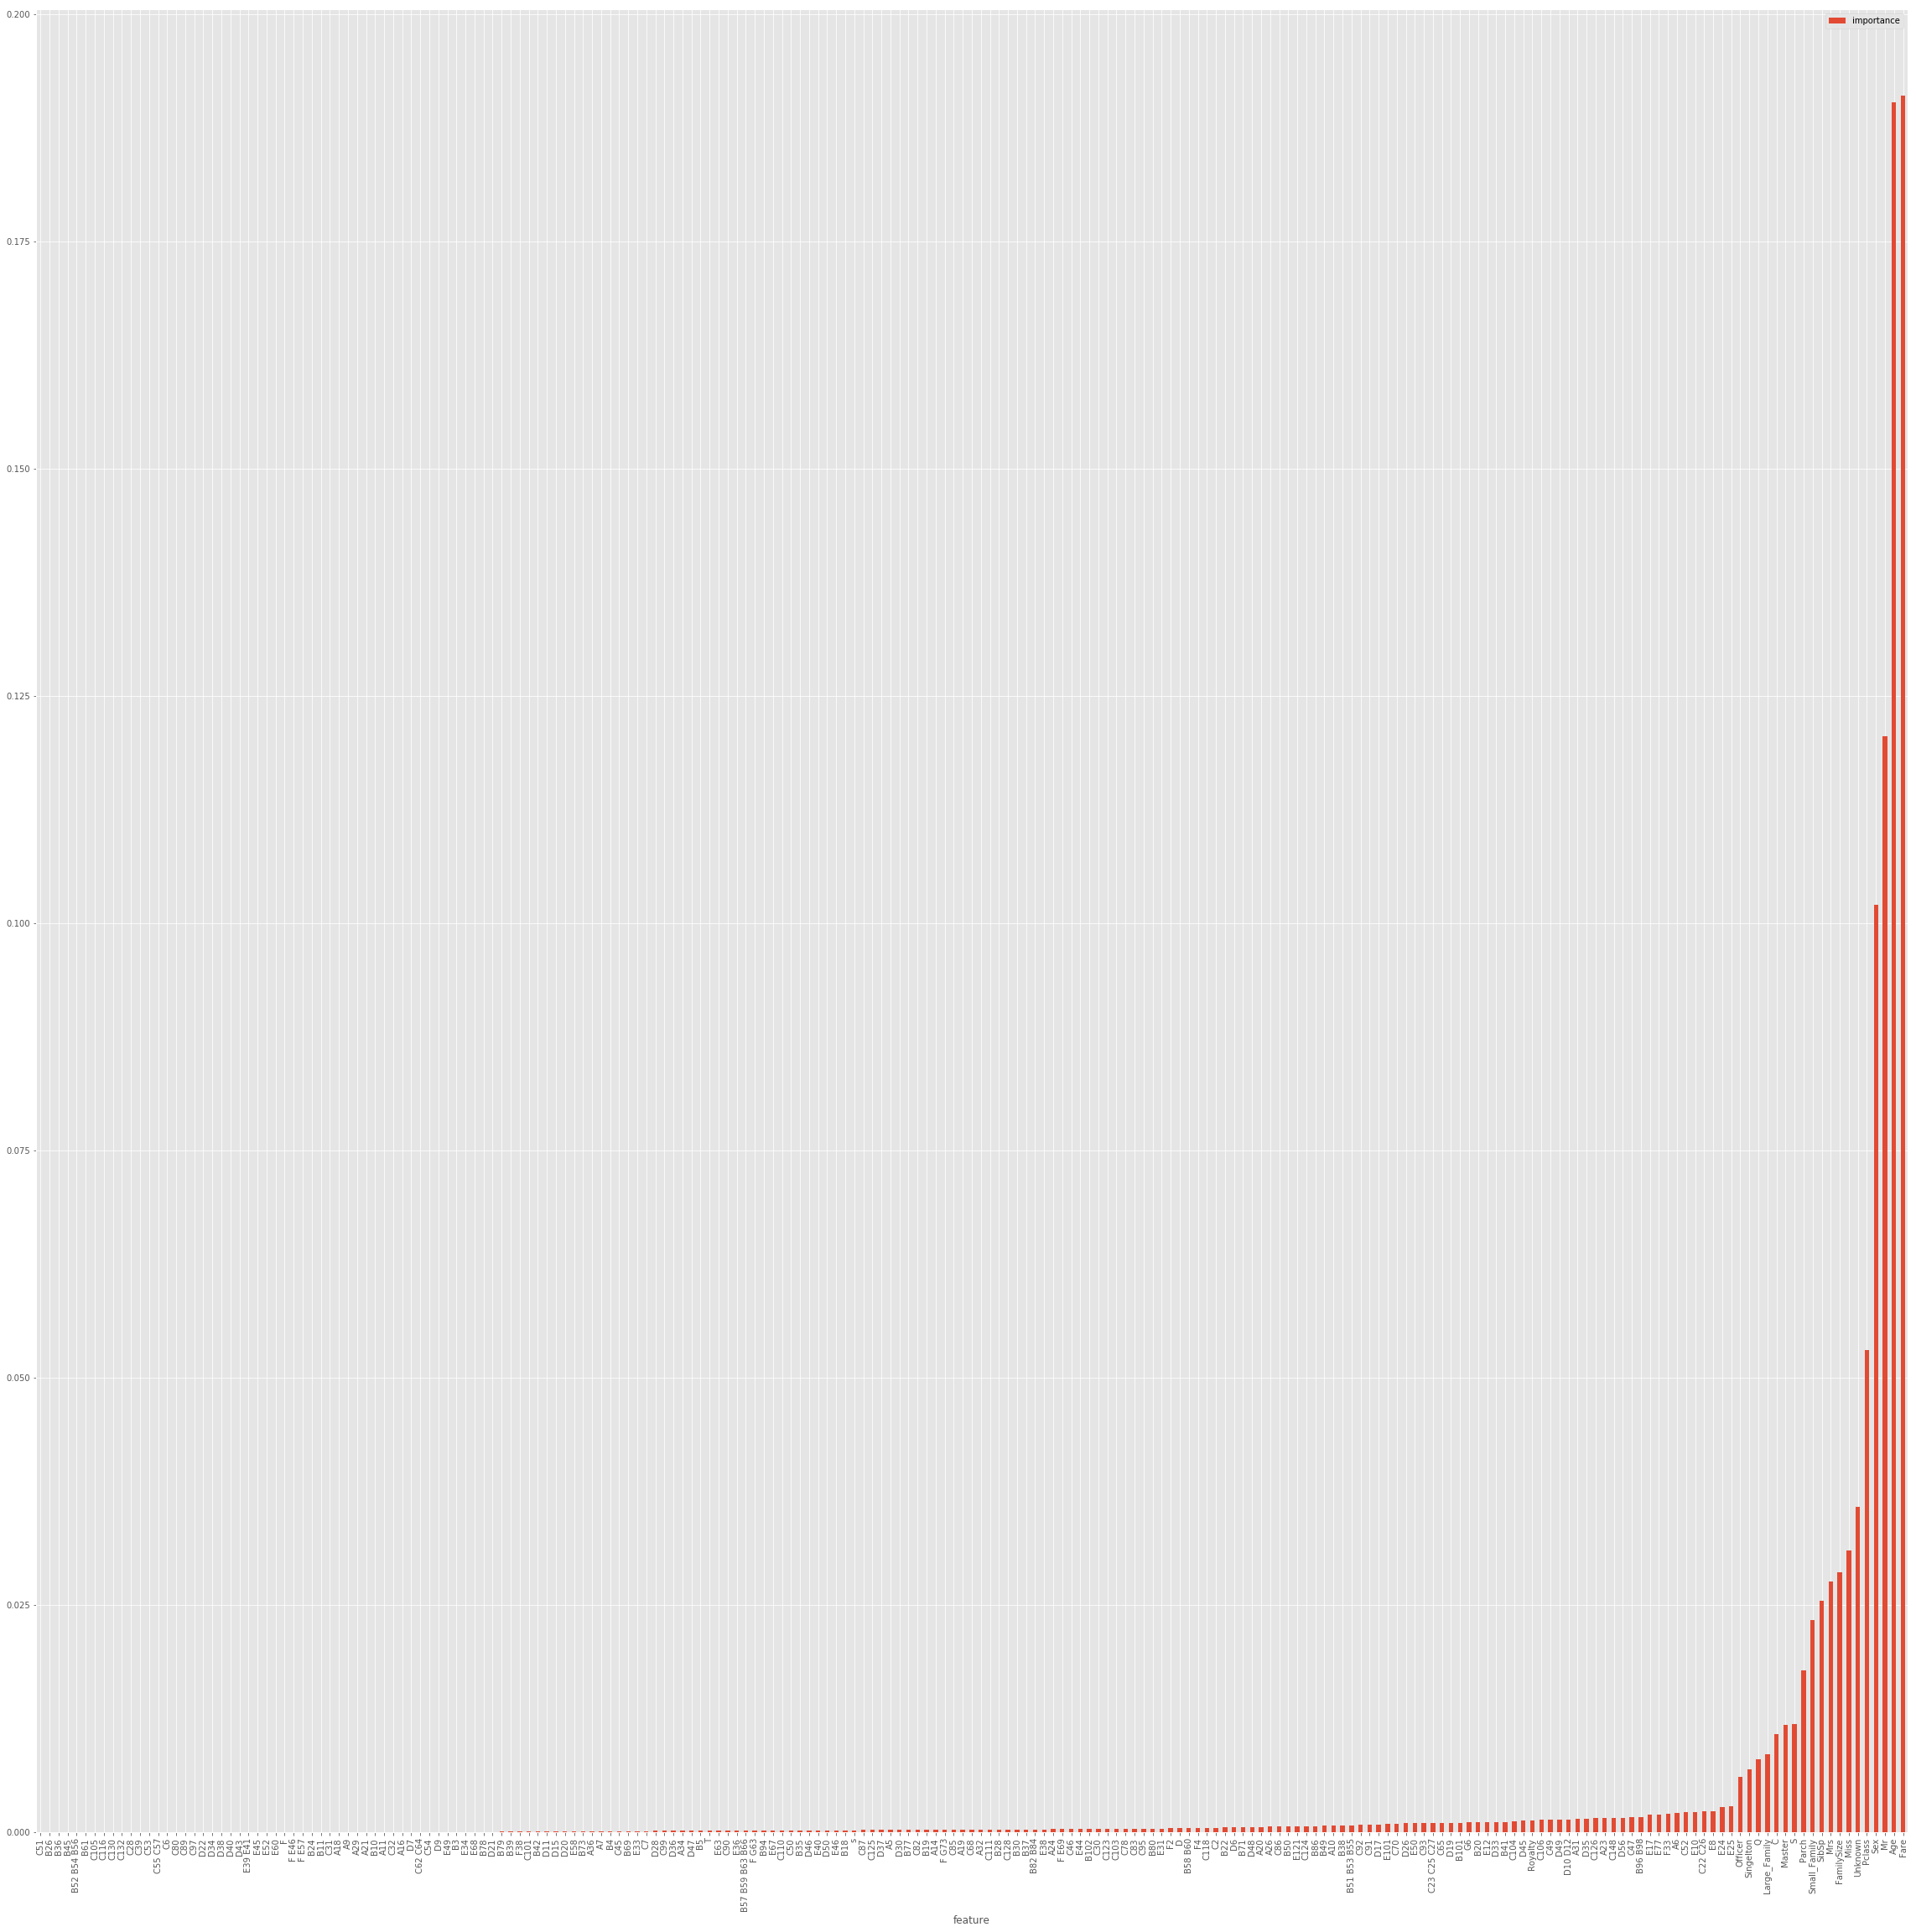

In [240]:
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators = 50)
clf = clf.fit(train,targets)
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by = 'importance', inplace = True)

features.set_index('feature', inplace = True)
features.plot(kind = 'bar',figsize=(40,40))

In [241]:
model = SelectFromModel(clf,prefit = True)

In [242]:
train_reduced = model.transform(train)
test_treduced = model.transform(test)

In [243]:
train_reduced.shape

(891, 19)

In [409]:
parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators':53, 
                  'min_samples_split': 13, 'max_features': 'sqrt', 'max_depth': 12}
model = RandomForestClassifier(**parameters)
model.fit(train,targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=12, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=13, min_weight_fraction_leaf=0.0,
            n_estimators=53, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [410]:
the best n_estimator  is 53 so far

SyntaxError: invalid syntax (<ipython-input-410-a8413750e55d>, line 1)

In [411]:
model.score(train,targets)

0.84960718294051629

In [412]:
output = model.predict(test)

In [413]:
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output

In [414]:
type(df_output)

pandas.core.frame.DataFrame

In [415]:
df_output.to_csv('/Users/shimaimani/Dropbox/KaggleTitanic/submit3.csv',index = False)

In [416]:
result = pd.read_csv('submit3.csv')

In [417]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [418]:
result.shape

(418, 2)